## Data Aggregation/grouping and Pivot table using Pandas

#### Objectives:
<br>- Data filtering 
<br>- Data preprocessing
<br>- Data Aggregation/grouping
<br>- Pivot table
<br>- Data Visualization: Barplot

In [114]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [115]:
df= pd.read_csv("audi.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


In [116]:
#df["model"].value_counts()
#print(df['model'].unique())
#df.describe()
#df.shape
#df.info()

#### Data Filtering

In [117]:
# filter out all descriptions of any particular "model"
df_SQ7 = df[df['model']== ' SQ7']
display(df_SQ7)
print(df_SQ7.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
7514,SQ7,2017,52888,Automatic,12000,Diesel,39.2,4.0
7548,SQ7,2017,51990,Automatic,30000,Diesel,39.2,4.0
7579,SQ7,2017,44444,Automatic,20761,Diesel,39.2,4.0
7615,SQ7,2016,45990,Automatic,25514,Diesel,39.2,4.0
7635,SQ7,2017,47990,Automatic,42000,Diesel,39.2,4.0
10144,SQ7,2017,43950,Automatic,40000,Diesel,39.2,4.0
10208,SQ7,2017,59950,Semi-Auto,23000,Diesel,39.2,4.0
10534,SQ7,2017,46950,Automatic,28000,Diesel,39.2,4.0


(8, 8)


In [118]:
#find the average price of the " SQ7" model cars
df_SQ7['price'].sum()/8

49269.0

### Data Aggregation

In [119]:
# based on price we are getting informations (count, mean, sum) of "model" column

df_agg = df.groupby('model')['price'].agg(['count', 'mean', "sum"])
display(df_agg)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


### PIVOT table

In [120]:
df_pivot = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858


### Data Preprocessing before visualization


In [121]:
# sort the dataframe base on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

#create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg["count"].sum())*100

#converting sum column in millions
df_agg["sum"]=df_agg['sum']/100000

#rounding
df_agg=df_agg.round(2)

#drop the count column
df_agg = df_agg.drop("count", axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,335.81,18.08
Q3,22999.26,325.90,13.28
A4,20255.45,279.73,12.95
A1,14327.75,192.99,12.63
A5,23577.11,207.95,8.27


#### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

#### Questions based on model, transmission and fuelType
<br>-What are the top 5 selling car models in the dataset?
<br>-What's the average selling price of the top 5 selling car models?
<br>-What's the total sale of the yop 5 selling car models?

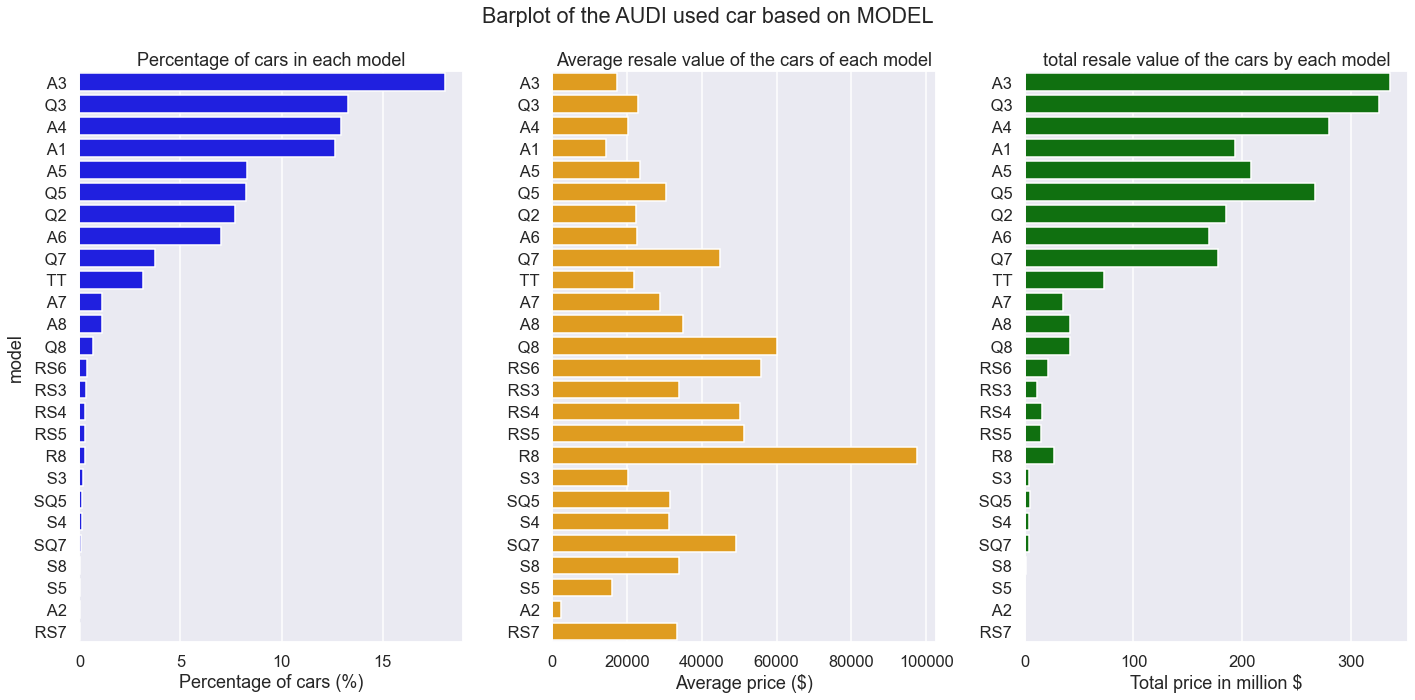

In [122]:
def my_fun(x, y, data, color, title, xlabel):
    
    sns.barplot(x=x, y=y, data=data, orient='h', color=color)
    plt.title(title)
    plt.xlabel(xlabel)

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
my_fun('percent_of_cars',df_agg.index, df_agg, "blue", "Percentage of cars in each model", "Percentage of cars (%)")

plt.subplot(1, 3, 2)
my_fun('mean',df_agg.index, df_agg, 'orange', "Average resale value of the cars of each model", "Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
my_fun('sum',df_agg.index, df_agg, 'green', "total resale value of the cars by each model", "Total price in million $")

plt.ylabel("")

plt.suptitle("Barplot of the AUDI used car based on MODEL")
plt.tight_layout()
plt.show()

## for TRANSMISSION column

In [123]:
df_trans_agg = df.groupby('transmission')['price'].agg(['count', 'mean', "sum"])
display(df_trans_agg)

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


In [124]:

df_trans_agg = df_trans_agg.sort_values(by='count', ascending=False)
df_trans_agg['percent_of_cars'] = (df_trans_agg['count']/df_trans_agg["count"].sum())*100
df_trans_agg["sum"]=df_trans_agg['sum']/100000
df_trans_agg=df_trans_agg.round(2)
df_trans_agg = df_trans_agg.drop("count", axis=1)

display(df_trans_agg.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,16101.03,703.45,40.95
Semi-Auto,27161.78,975.38,33.66
Automatic,28204.75,763.78,25.38


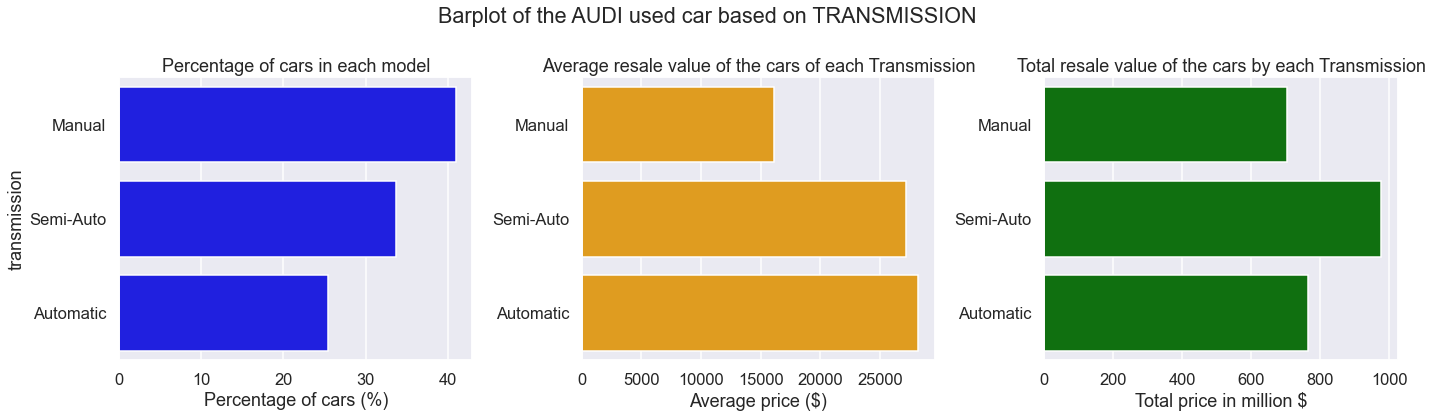

In [125]:

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
my_fun('percent_of_cars',df_trans_agg.index, df_trans_agg, "blue", "Percentage of cars in each model", "Percentage of cars (%)")

plt.subplot(1, 3, 2)
my_fun('mean', df_trans_agg.index, df_trans_agg, 'orange', "Average resale value of the cars of each Transmission", "Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
my_fun('sum', df_trans_agg.index, df_trans_agg, 'green', "Total resale value of the cars by each Transmission", "Total price in million $")
plt.ylabel("")


plt.suptitle("Barplot of the AUDI used car based on TRANSMISSION")
plt.tight_layout()
plt.show()